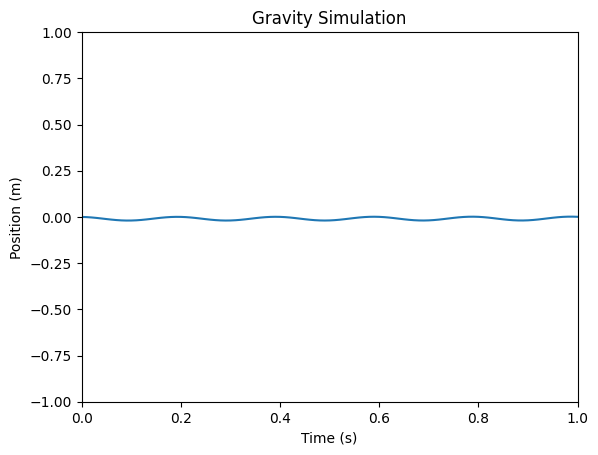

In [73]:
import matplotlib.pyplot as plt

# Constants
acceleration = -9.81  # acceleration due to gravity in m/s^2
mass = 1.0           # mass of the object in kg
original_position = 0.0
original_velocity = 0.0

# Variables
position = original_position
velocity = original_velocity

# Time step (adjust as needed)
dt = 0.01

# Lists to store position and time values for plotting
positions = [original_position]
times = [0]

# Set up the plot
fig, ax = plt.subplots()
ax.set_title("Gravity Simulation")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
line, = ax.plot(times, positions, label="Position")

# Simulation duration (adjust as needed)
simulation_duration = 1.0

# PID controller
Kp = 1000
Ki = 100
Kd = 0.01
target = 0

error = target - position
integral = 0
derivative = 0

# Simulation loop
try:
    for _ in range(int(simulation_duration / dt)):
        
        previous_error = error
        error = target - position
        integral = integral + error * dt
        derivative = (error - previous_error) / dt
        
        signal = max(0, Kp * error + Ki * integral + Kd * derivative)
        
        # Verlet integration method
        position_next = 2 * position - original_position + (acceleration+signal) * dt**2
        velocity = (position_next - original_position) / (2 * dt)

        # Update position and reset original_position for the next iteration
        original_position, position = position, position_next

        # Append current position and time values for plotting
        positions.append(position)
        times.append(times[-1] + dt)

        # Print information for debugging
        #print("Time: {:.1f} s, Position: {:.2f} m, Acceleration: {:.2f}".format(times[-1], positions[-1], acceleration))
        #print("Error: {:.2f}, Integral: {:.2f}, Derivative: {:.2f}".format(error, integral, derivative))

    # Save the results to a file
    with open("gravity_simulation_results.txt", "w") as file:
        for t, pos in zip(times, positions):
            file.write("{:.1f} {:.2f}\n".format(t, pos))

    # Update the plot with all information
    line.set_xdata(times)
    line.set_ydata(positions)

    # Adjust plot limits for better visualization
    ax.set_xlim(min(times), max(times))
    #ax.set_ylim(min(positions), max(positions))

    ax.set_ylim(-1,1)

    # Display the final plot
    plt.show()

except KeyboardInterrupt:
    print("\nSimulation terminated by user.")


In [30]:
from sklearn import linear_model
import os
import numpy as np
import pandas as pd
#modesdfqsdl = linear_model()




In [28]:
# class data:
#     def __init__(self, Kp, Ki, Kd, target, results):
#         self.Kp = Kp
#         self.Ki = Ki
#         self.Kd = Kd
#         self.target = target
#         self.results = results



In [31]:
data = []
for file in os.listdir("./results/"):
    Kp, Ki, Kd, target = file[4:-4].split("_")[::2]
    results = pd.read_csv("./results/"+file, sep=" ", header=None)
    data.append([Kp, Ki, Kd, target, results])


In [27]:
results

array([[ 0.00000000e+00, -5.00983500e-05],
       [ 1.00000000e-04, -1.50295250e-04],
       [ 2.00000000e-04, -3.00590850e-04],
       ...,
       [ 9.99800000e-01, -9.31318971e+01],
       [ 9.99900000e-01, -9.31039475e+01],
       [ 1.00000000e+00, -9.30759548e+01]])

In [ ]:
model.fit(X_train, y_train)